In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from collections import defaultdict

%matplotlib inline

In [2]:
%config Completer.use_jedi = False

In [3]:
train = pd.read_csv("/Users/sergmiller/Downloads/train.csv")
edu = pd.read_csv("/Users/sergmiller/Downloads/trainEducationFeatures.csv")
groups =  pd.read_csv("/Users/sergmiller/Downloads/trainGroups.csv")
friends =  pd.read_csv("/Users/sergmiller/Downloads/friends.csv")

In [4]:
np.mean(train['registered_year'])

2013.7580508330789

In [5]:
np.corrcoef(train['registered_year'].values, train['age'].values)

array([[ 1.        , -0.09645648],
       [-0.09645648,  1.        ]])

(array([ 215., 1516., 5647., 3314., 4802., 1981., 3671., 1731., 3629.,
        2963.]),
 array([2006. , 2007.5, 2009. , 2010.5, 2012. , 2013.5, 2015. , 2016.5,
        2018. , 2019.5, 2021. ]),
 <BarContainer object of 10 artists>)

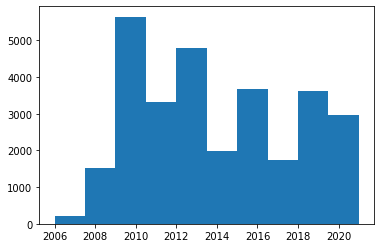

In [6]:
plt.hist(train['registered_year'])

In [7]:
from sklearn.linear_model import LinearRegression

In [158]:
max(train['age'])

89

In [176]:
edu.shape, train.shape

((29469, 9), (29469, 3))

In [8]:
edu_with_register = pd.merge(edu[~pd.isnull(edu['school_education'])], train, how='left', on='uid')

In [9]:
edu_with_register

uid  school_education  graduation_1  graduation_2  graduation_3  \
0      30288            2008.0           NaN           NaN           NaN   
1      25275            2007.0           NaN           NaN           NaN   
2     116156            2008.0           NaN           NaN           NaN   
3      10794            2006.0           NaN           NaN           NaN   
4      99780            1995.0           NaN           NaN           NaN   
...      ...               ...           ...           ...           ...   
9109   90272            2010.0           NaN           NaN           NaN   
9110   33331            1987.0           NaN           NaN           NaN   
9111   97581            2002.0           NaN           NaN           NaN   
9112  104038            1969.0           NaN           NaN           NaN   
9113   95258            1983.0           NaN           NaN           NaN   

      graduation_4  graduation_5  graduation_6  graduation_7  age  \
0              NaN        2013.0           NaN           NaN   30   
1              NaN           NaN        2011.0           NaN   31   
2              NaN           NaN           NaN           NaN   28   
3              NaN           NaN           NaN        2014.0   34   
4              NaN           NaN           NaN           NaN   42   
...            ...           ...           ...           ...  ...   
9109           NaN           NaN           NaN           NaN   32   
9110           NaN        1991.0           NaN           NaN   51   
9111           NaN        2007.0           NaN           NaN   36   
9112           NaN           NaN           NaN           NaN   69   
9113           NaN           NaN           NaN           NaN   53   

      registered_year  
0                2008  
1                2007  
2                2010  
3                2010  
4                2012  
...               ...  
9109             2012  
9110             2008  
9111             2010  
9112             2013  
9113             2011  

[9114 rows x 11 columns]

In [10]:
edu_with_g5 = pd.merge(edu[~pd.isnull(edu['graduation_5'])], train, how='left', on='uid')

In [11]:
edu_with_g5_and_reg = pd.merge(edu[~pd.isnull(edu['graduation_5'])][~pd.isnull(edu['school_education'])], train, how='left', on='uid')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [419]:
edu_with_g5_and_reg.shape

(1268, 11)

In [12]:
def decision(school: float, register: float, groups: list):
    if np.isnan(school):
        r = 697.208 - 0.32883 * register  # approx 35
    else:
#         r = 2021 - school + 18
        r = 1918.977 - 0.05583 * register - 0.88422 * school
#         r = 1808.62 - 0.88519 * school
    r = max(r, 14)
    r = min(89, r)
    return r


def make_predictions(ids: pd.DataFrame, education: pd.DataFrame, groups: pd.DataFrame) -> pd.DataFrame:
    result = pd.DataFrame()
    result['uid'] = ids['uid']
    school = {uid : year for uid, year in zip(education['uid'].values, education['school_education'].values)}
    register = {uid : year for uid, year in zip(ids['uid'].values, ids['registered_year'].values)}
    groups_list = defaultdict(list)
    for uid, gid in zip(groups['uid'].values, groups['gid'].values):
        groups_list[uid].append(gid)
    result['age'] = [decision(school[uid], register[uid], groups_list[uid]) for uid in result['uid'].values]
    assert result.shape[0] == ids.shape[0] and result.shape[1] == 2
    assert ['uid', 'age'] == list(result.columns)
    return result

In [364]:
res = make_predictions(train, edu, groups)

In [360]:
np.mean((res['age'] - train['age']) ** 2) ** 0.5

11.541098370410738

In [19]:
result.to_csv('/Users/sergmiller/Downloads/result.csv', index=None, index_label=None)

In [23]:
np.mean(train['age'].values)

35.02914927550986

In [17]:
list(result.columns)

['uid', 'age']

In [ ]:
np.mean(train['age'].values)

In [13]:
from implicit.als import AlternatingLeastSquares
from scipy.sparse import csr_matrix

In [14]:
user_weights = groups.groupby('uid').gid.nunique()
user2weight = {u:w for u,w in zip(user_weights.index.values, user_weights.values)}

In [772]:
row = groups['gid'].values
col = groups['uid'].values
# data = [user2weight[u] for u in col]
data_group_age = [uid2age[u] for u in col]

(array([1.784e+03, 1.130e+03, 8.550e+02, 7.280e+02, 7.080e+02, 6.500e+02,
        6.140e+02, 5.250e+02, 5.000e+02, 5.270e+02, 4.330e+02, 4.150e+02,
        2.970e+02, 4.240e+02, 3.910e+02, 3.470e+02, 3.270e+02, 3.050e+02,
        2.900e+02, 3.050e+02, 2.970e+02, 3.000e+02, 2.530e+02, 2.820e+02,
        1.690e+02, 2.260e+02, 2.400e+02, 2.170e+02, 2.520e+02, 2.020e+02,
        1.840e+02, 1.850e+02, 2.000e+02, 6.029e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.  ,   3.92,   6.84,   9.76,  12.68,  15.6 ,  18.52,  21.44,
         24.36,  27.28,  30.2 ,  33.12,  36.04,  38.96,  41.88,  44.8 ,
         47.72,  50.64,  53.56,  56.48,  59.4 ,  62.32,  65.24,  68.16,
         71.08,  74.  ,  76.92,  79.84,  82.76,  85.68,  88.6 ,  91.52,
         94.44,  97.36, 100.28, 103.2 , 106.12, 109.04, 111.96, 114.88,
        117.8 , 

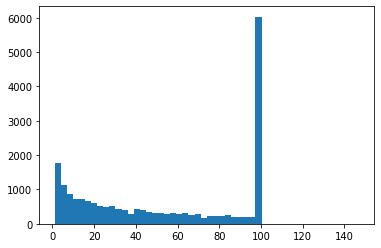

In [16]:
plt.hist(user_weights.values, bins=50)

In [17]:
max(row), max(col)

(362032, 120055)

In [18]:
train_g2u = csr_matrix((data, (row, col)), shape=(362033, 120056))

In [773]:
train_g2u_age = csr_matrix((data_group_age, (row, col)), shape=(362033, 120056))

In [19]:
als = AlternatingLeastSquares(factors=32, random_state=0)
als.fit(train_g2u)

  0%|          | 0/15 [00:00<?, ?it/s]

In [774]:
als_group_age = AlternatingLeastSquares(factors=32, random_state=0)
als_group_age.fit(train_g2u_age)

  0%|          | 0/15 [00:00<?, ?it/s]

In [308]:
als.item_factors.shape

(362033, 32)

In [309]:
als.user_factors.shape

(120056, 32)

In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [777]:
N = 10000

In [775]:
user_embs_for_knn_als_group_age = np.array([als_group_age.user_factors[u] for u in train['uid'].values])
knn_age = train['age'].values
user_embs_for_knn_als_group_age.shape, knn_age.shape

((29469, 32), (29469,))

In [21]:
def calc_embedding_by_user_groups(user_groups: np.array):
    groups_embeds = als.item_factors[user_groups]
    user_embed = np.mean(groups_embeds, axis=0)
    return user_embed

In [351]:
%%time
for x in user_embs_for_knn[N:]:
    print(float(knn.predict([x])))
    break

31.426724404225716
CPU times: user 6.27 ms, sys: 2.66 ms, total: 8.93 ms
Wall time: 2.73 ms


In [779]:
%%time
knn = KNeighborsRegressor(weights='distance', n_neighbors=25)
knn.fit(user_embs_for_knn_als_group_age, knn_age)

knn_age_predicted = knn.predict(user_embs_for_knn_als_group_age)

res = np.mean((knn_age_predicted - knn_age) ** 2) ** 0.5
res

CPU times: user 29.2 s, sys: 6.57 s, total: 35.8 s
Wall time: 17.5 s


7.739072997473664

In [778]:
%%time
knn = KNeighborsRegressor(weights='distance', n_neighbors=25)
knn.fit(user_embs_for_knn_als_group_age[:N], knn_age[:N])

knn_age_predicted = knn.predict(user_embs_for_knn_als_group_age[N:])

res = np.mean((knn_age_predicted - knn_age[N:]) ** 2) ** 0.5
res

CPU times: user 6.6 s, sys: 1.83 s, total: 8.43 s
Wall time: 4.07 s


10.741940886753522

In [348]:
pd.read_csv('../submision/data/train_groups.csv').values.shape

(160831, 1)

In [326]:
known_groups = np.unique(groups['gid'].values)

In [329]:
pd.DataFrame(known_groups).to_csv("../submision/data/train_groups.csv", index=None, index_label=None)

In [330]:
user_embs_for_knn.shape

(29469, 32)

In [331]:
train['uid'].shape

(29469,)

In [332]:
pd.DataFrame(train).to_csv("../submision/data/train.csv", index=None, index_label=None)

In [336]:
pd.DataFrame(user_embs_for_knn).to_csv("../submision/data/train_als_user_embeddings.csv", index=None, index_label=None)

In [340]:
group_embds_for_knn = als.item_factors[known_groups]

In [341]:
group_embds_for_knn.shape

(160831, 32)

In [339]:
user_embs_for_knn.shape

(29469, 32)

In [342]:
pd.DataFrame(group_embds_for_knn).to_csv("../submision/data/train_als_group_embeddings.csv", index=None, index_label=None)

In [345]:
als.item_factors[[1,2]]

array([[-0.03352285,  0.01173679, -0.00479133, -0.00079793,  0.00691519,
         0.02763588, -0.00387738, -0.02486044, -0.00412413, -0.01828809,
         0.03304713,  0.00094347,  0.03785113, -0.00548973,  0.00034857,
        -0.02208665,  0.00284895,  0.03267703, -0.00689618,  0.02914728,
         0.01545629,  0.01312421,  0.01298617,  0.01491231, -0.01607238,
        -0.00461709, -0.00313677,  0.00893403,  0.01912749,  0.04901997,
        -0.00721672,  0.02671472],
       [ 0.01577521, -0.00342512, -0.03403663, -0.00619824, -0.01844874,
         0.02002376, -0.01083123, -0.01982027, -0.02211998,  0.02357365,
         0.02775149,  0.00207958,  0.00818852,  0.0136739 ,  0.01661555,
         0.00561788, -0.01665961, -0.01122996, -0.00927404, -0.0091855 ,
         0.01583714,  0.01119312,  0.01644872, -0.00017456,  0.01745618,
         0.00827894,  0.00624486,  0.00029817,  0.00274924,  0.02194361,
         0.00729352,  0.02449917]], dtype=float32)

In [368]:
pd.read_csv('../submision/data/train_als_user_embeddings.csv').values

array([[ 0.00620317,  0.01065773, -0.01442813, ...,  0.02823488,
         0.02111417,  0.0143768 ],
       [ 0.6269256 , -0.19519456,  0.26703796, ...,  0.19338019,
         0.8778059 , -0.30893627],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02584702,  0.06221347, -0.00454262, ...,  0.01528523,
         0.01898878,  0.09596544],
       [-0.5718822 ,  0.6594821 ,  0.07554404, ..., -1.6461611 ,
         0.64993376, -1.061764  ]])

In [22]:
friends2way = pd.DataFrame()
friends2way['uid'] = list(friends['uid']) + list(friends['fuid'])
friends2way['fuid'] = list(friends['fuid']) + list(friends['uid'])

In [23]:
friends2way.shape

(8219754, 2)

In [24]:
friend_weights = friends2way.groupby('uid').fuid.nunique()
friend2weight = {u:w for u,w in zip(friend_weights.index.values, friend_weights.values)}

In [25]:
rowf = friends2way['fuid'].values
colf = friends2way['uid'].values
dataf = [friend2weight[u] for u in colf]

(array([7.1364e+04, 2.3933e+04, 1.0380e+04, 2.4480e+03, 6.8500e+02,
        3.7100e+02, 2.3300e+02, 2.0600e+02, 1.2700e+02, 9.4000e+01,
        7.8000e+01, 7.3000e+01, 5.8000e+01, 4.5000e+01, 4.2000e+01,
        2.8000e+01, 2.4000e+01, 2.2000e+01, 1.4000e+01, 1.2000e+01,
        2.1000e+01, 7.0000e+00, 1.0000e+01, 1.0000e+01, 1.0000e+01,
        7.0000e+00, 3.0000e+00, 6.0000e+00, 5.0000e+00, 4.0000e+00,
        3.0000e+00, 3.0000e+00, 5.0000e+00, 2.0000e+00, 1.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00, 2.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([1.00000e+00, 5.55200e+01, 1.10040e+02, 1.64560e+02, 2.19080e+02,
        2.73600e+02, 3.28120e+02, 3.82640e+02, 4.37160e+02, 4.91680e+02,
        5.46200e+02, 6.00720e+02, 6.55240e+02, 7.09760e+02, 7.64280e+02,
        8.18800e+02, 8.73320e+02, 9.27840e+02, 9.82360e+02, 1.03688e+03,
        1.09140e+03, 1.145

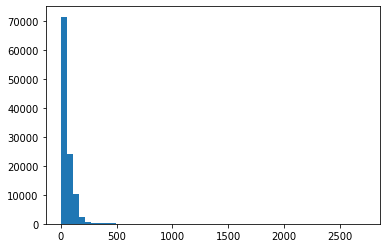

In [26]:
plt.hist(friend_weights.values, bins=50)

In [27]:
max(rowf), max(colf)

(120060, 120060)

In [28]:
train_f2u = csr_matrix((dataf, (rowf, colf)), shape=(120061, 120061))

In [732]:
train_f2u_w1 = csr_matrix((np.ones_like(dataf), (rowf, colf)), shape=(120061, 120061))

In [592]:
friends_als = AlternatingLeastSquares(factors=16, random_state=0)  # was 16
friends_als.fit(train_f2u)

  0%|          | 0/15 [00:00<?, ?it/s]

In [1206]:
from sklearn.decomposition import TruncatedSVD

In [1235]:
svd = TruncatedSVD(n_components=16, random_state=0)
train_f2u_w1_svd_16 = svd.fit_transform(train_f2u_w1)

In [1236]:
train_f2u_w1_svd_16.shape

(120061, 16)

In [1237]:
pd.DataFrame(train_f2u_w1_svd_16).to_csv("../submision/data/train_f2u_w1_svd_16.csv", index=None, index_label=None)

In [922]:
als.item_factors.shape

(362033, 32)

In [921]:
#group_als_all_user_embeddings.csv
pd.DataFrame(als.user_factors).to_csv("../submision/data/group_als_all_user_embeddings.csv", index=None, index_label=None)

In [549]:
als.user_factors.shape

(120056, 32)

In [396]:
from sklearn.neighbors import KNeighborsRegressor

In [397]:
N = 10000

In [398]:
user_embs_for_knn = np.array([als.user_factors[u] for u in train['uid'].values])
knn_age = train['age'].values
user_embs_for_knn.shape, knn_age.shape

((29469, 16), (29469,))

In [399]:
def calc_embedding_by_user_friends(user_friends: np.array):
    groups_embeds = als.item_factors[user_friends]
    user_embed = np.mean(groups_embeds, axis=0)
    return user_embed

In [351]:
%%time
for x in user_embs_for_knn[N:]:
    print(float(knn.predict([x])))
    break

31.426724404225716
CPU times: user 6.27 ms, sys: 2.66 ms, total: 8.93 ms
Wall time: 2.73 ms


In [400]:
%%time
knn = KNeighborsRegressor(weights='distance', n_neighbors=25)
knn.fit(user_embs_for_knn, knn_age)

knn_age_predicted = knn.predict(user_embs_for_knn)

res = np.mean((knn_age_predicted - knn_age) ** 2) ** 0.5
res

CPU times: user 29.5 s, sys: 6.69 s, total: 36.1 s
Wall time: 17.5 s


4.1398631323867425

In [403]:
%%time

for ng in [5,10,15,20,25,50,100]:
    knn = KNeighborsRegressor(weights='distance', n_neighbors=ng)
    knn.fit(user_embs_for_knn[:N], knn_age[:N])

    knn_age_predicted = knn.predict(user_embs_for_knn[N:])

    res = np.mean((knn_age_predicted - knn_age[N:]) ** 2) ** 0.5
    print(ng, res)

5 10.627967069866244
10 10.174975948579815
15 10.13221329894644
20 10.093566655497026
25 10.090185866004456
50 10.145900310413072
100 10.230385974242639
CPU times: user 49.6 s, sys: 12.6 s, total: 1min 2s
Wall time: 31.3 s


In [134]:
known_friends = np.unique(friends2way['uid'].values)

In [405]:
pd.DataFrame(known_friends).to_csv("../submision/data/train_friends.csv", index=None, index_label=None)

In [591]:
friends_train_user_embs_for_knn.shape, friends_user_embds_for_knn.shape

((29469, 8), (110352, 8))

In [593]:
friends_train_user_embs_for_knn = np.array([friends_als.user_factors[u] for u in train['uid'].values])
friends_user_embds_for_knn = friends_als.item_factors[known_friends]

In [594]:
pd.DataFrame(friends_train_user_embs_for_knn).to_csv("../submision/data/train_friends_als_user_embeddings.csv", index=None, index_label=None)
pd.DataFrame(friends_user_embds_for_knn).to_csv("../submision/data/friends_als_user_embeddings.csv", index=None, index_label=None)

In [910]:
pd.DataFrame(friends_als.user_factors).to_csv("../submision/data/friends_als_all_user_embeddings.csv", index=None, index_label=None)

In [595]:
friends_embds_for_knn = friends_als.item_factors[known_friends]

In [596]:
pd.DataFrame(friends_embds_for_knn).to_csv("../submision/data/train_friends_als_friends_embeddings.csv", index=None, index_label=None)

In [145]:
from sklearn.neural_network import MLPRegressor

In [31]:
uid2age =  {u:a for u,a in zip (train['uid'].values, train['age'].values)}

In [36]:
from fast_pagerank import pagerank_power

In [42]:
friend_pr=pagerank_power(train_f2u, p=0.85, tol=1e-3)

In [43]:
friend_pr

array([3.27044627e-06, 2.52198502e-05, 1.34158138e-06, ...,
       1.38165961e-06, 1.34158138e-06, 1.59154157e-05])

In [780]:
friend_pr_v2 = pagerank_power(train_f2u, p=0.1, tol=1e-3)

In [781]:
friend_pr_v2

array([7.74463918e-06, 9.80807013e-06, 7.55730325e-06, ...,
       7.57879466e-06, 7.55730325e-06, 9.87380830e-06])

In [99]:
friends_list = defaultdict(list)
for uid, fuid in zip(friends['uid'].values, friends['fuid'].values):
    friends_list[uid].append(fuid)
    friends_list[fuid].append(uid)

In [128]:
f_cache = {}
def get_friends_mean_embed(uid):
    if uid in f_cache:
        return f_cache[uid]
    e = np.zeros(16)
    f_list = friends_list[uid]
    if len(f_list) == 0:
        return e
    for f in f_list:
        e += friends_als.user_factors[f]
    r = e / len(f_list)
    f_cache[uid] = r
    return r

In [150]:
def decision_naive_impl(school: float, register: float, g5: float) -> float:
    if np.isnan(school):
        if np.isnan(g5):
            r = 697.208 - 0.32883 * register  # LM approx 35
        else:
            r = 1287.602 + 0.26818 * register - 0.89101 * g5  # LM approx register and graduation_5
    else:
        if np.isnan(g5):
            r = 1918.977 - 0.05583 * register - 0.88422 * school  # LM approx 2021 - school + 18 + Residual(register)
        else:
            r = 1821.079 + 0.06561 * register - 0.82946 * school - 0.12747 * g5  # LM approx all available params
    r = max(14, r)
    r = min(89, r)
    return r

In [193]:
import networkx as nx

In [195]:
g = nx.Graph()

for st in friends_list.keys():
    for fn in friends_list[st]:
        g.add_edge(st, fn)

In [197]:
numNodes = len(g.nodes)
numNodes

110352

In [228]:
import networkx as nx
import numpy as np
import scipy
from scipy.sparse import csgraph

numNodes = len(g.nodes)
degreeHist = nx.degree_histogram(g)
degreeKernel = [x/numNodes for x in degreeHist]

In [218]:
A = nx.convert_matrix.to_scipy_sparse_matrix(g)

In [1238]:
G_H = 2 + 16
X = np.zeros((110352, G_H))

id2node = {_id: i for i, _id in enumerate(list(g.nodes))}

for i,uid in enumerate(list(g.nodes)):
    X[i] = [
        friend2weight.get(uid, 0),
#         user2weight.get(uid, 0),
        friend_pr[uid]
    ] + list(train_f2u_w1_svd_16[uid])  #+ list(friends_als.user_factors[uid])

In [1239]:
np.random.seed(0)
G_DIM = 64
W0 = np.random.normal(size=(G_H, G_DIM)) / (G_DIM ** 0.5)
W1 = np.random.normal(size=(G_H + G_DIM, G_DIM)) / ((G_H + G_DIM) ** 0.5)
W2 = np.random.normal(size=(G_H + 2 * G_DIM, G_DIM)) / ((G_H + 2 * G_DIM) ** 0.5)
W3 = np.random.normal(size=(G_H + 3 * G_DIM, G_DIM)) / ((G_H + 3 * G_DIM) ** 0.5)

np.mean(np.sum(W0,axis=1)),np.mean(np.sum(W1,axis=1)),np.mean(np.sum(W2,axis=1)),np.mean(np.sum(W3,axis=1))

(-0.27144582958536595,
 -0.07314975974646727,
 -0.03288278916306396,
 0.012127650685856618)

In [1240]:
D = scipy.sparse.csgraph.laplacian(A, normed=True)
# слой 0
Xc = D @ X @ W0
# ReLU
Xc = Xc * (Xc>0)
# конкатенация признаков вершин с аггрегированной информацией соседей
Xn = np.hstack((X, Xc))
# слой 1
Xc = D @ Xn @ W1
# ReLU
Xc = Xc * (Xc>0)
Xn = np.hstack((Xn, Xc))
# слой 2
Xc = D @ Xn @ W2

# Xc = Xc * (Xc>0)
# Xn = np.hstack((Xn, Xc))
# # слой 3
# Xc = D @ Xn @ W3

embedding = Xc / np.abs(Xc).sum(axis=1, keepdims=True)

In [600]:
from sklearn.decomposition import PCA

In [792]:
from sklearn.cluster import KMeans

In [813]:
kmeans = KMeans(n_clusters=8)

In [814]:
clusters = kmeans.fit_predict(embedding)

In [815]:
clusters

array([7, 7, 3, ..., 1, 1, 7], dtype=int32)

In [1241]:
pca = PCA(2)
proj = pca.fit_transform(embedding)
# proj = pca.fit_transform(friends_als.user_factors)

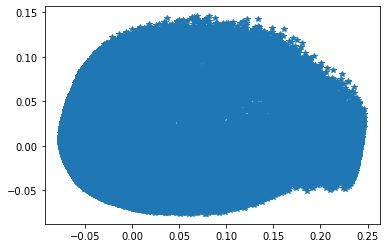

In [1242]:
plt.plot(proj[:, 0], proj[:, 1], '*')
plt.show()

In [1243]:
pd.DataFrame(list(g.nodes)).to_csv('../submision/data/graph_nodes_user_ids.csv', index=None, index_label=None)
pd.DataFrame(embedding).to_csv('../submision/data/graph_embeddings.csv', index=None, index_label=None)

In [1244]:
uid2gembeddding = {uid: embedding[i] for i, uid in enumerate(list(g.nodes))}

In [797]:
uid2kmeans = {uid: clusters[i] for i, uid in enumerate(list(g.nodes))}

In [514]:
import catboost

In [1254]:
edu_features = []
edu_ids = edu['uid']
edu_ages = np.array([uid2age[u] for u in edu_ids])
uid2register = {u:r for u,r in zip(train['uid'].values, train['registered_year'].values)}
for x in edu.iterrows():
    x = x[1]
    uid = int(x['uid'])
    get_2000 = lambda name: x[name] - 2000 if not np.isnan(x[name]) else 0
    make_ind = lambda name: int(np.isnan(x[name]))
    features_ind = [make_ind('school_education')]
    for i in range(1, 8):
        features_ind.append(make_ind('graduation_{}'.format(i)))
    features = [get_2000('school_education')]
    for i in range(1, 8):
        features.append(get_2000('graduation_{}'.format(i)))
    register_year = uid2register[uid]
    
    features.append(friend2weight.get(uid, 0)) # 16
    features.append(user2weight.get(uid, 0))  # 17

    features.append(friend_pr[uid])  # 18
    #features.append(friend_pr_v2[uid])
    #features.append(uid2kmeans.get(uid,-1))

    features.append(register_year) # 19
    features.append(f_min.get(uid, 35))  # 20
    features.append(f_max.get(uid, 35))  # 21
#     features.append(f_med.get(uid, 35))
    #features.append(f_mean.get(uid, 35))
    #features.append(f_reg_mean.get(uid, 2014))
    features.append(uid2mmg.get(uid, 35))  # 22
    features.append(uid2mmf.get(uid, 35))  # 23
    features.append(uid2mmg_reg.get(uid, 2014))  # 24
    features.append(uid2mmf_reg.get(uid, 2014))  # 25
#     features.append(uid2meta_pseudo.get(uid, 0))
#     features.append(decision_naive_impl(x['school_education'], register_year, x['graduation_5']))
    f = features_ind + features  + list(uid2gembeddding.get(uid, np.zeros(G_DIM))) +  list(friends_als.user_factors[uid])# + list(als.user_factors[uid])
    # + list(get_friends_mean_embed(uid))
#     f += list(uid2gembeddding.get(uid, np.zeros(16)))
    edu_features.append(f)

In [1255]:
GROUP_ALS_DIM = 32
FRIEND_ALS_DIM = 16
GEMBEDDINGS_DIM = G_DIM
ALS_TRAIN_GROUPS_TH = 1  # 5 is worse that 1
GROUP_OVER_FRIEND_WEIGHT = 0.75
ALS_OVER_NAIVE_WEIGHT = 0.5
# NAIVE_OVER_CB_WEIGHT = 0
# FRIEND_ALS_OVER_CB_WEIGHT = 0
FULL_ALS_OVER_CB_WEIGHT = 0.5

COMMON_SLICE_LEN = 8 + 8 + 2 + 1 + 7
#FORBIDEN_TAIL_OF_COMMON_SLICE_LEN = 6
CB_V1_FEATURE_SLICE = list(np.arange(COMMON_SLICE_LEN + GEMBEDDINGS_DIM + FRIEND_ALS_DIM))# + GROUP_ALS_DIM))
# CB_V1_5_FEATURE_SLICE = CB_V1_FEATURE_SLICE + list(np.arange(FRIEND_ALS_DIM) + COMMON_SLICE_LEN + GEMBEDDINGS_DIM)
# CB_V2_FEATURE_SLICE = list(np.arange(COMMON_SLICE_LEN - FORBIDEN_TAIL_OF_COMMON_SLICE_LEN)) + list(np.arange(FRIEND_ALS_DIM) + COMMON_SLICE_LEN + GEMBEDDINGS_DIM)
# CB_V3_FEATURE_SLICE = CB_V2_FEATURE_SLICE + list(np.arange(GROUP_ALS_DIM) + COMMON_SLICE_LEN + GEMBEDDINGS_DIM + FRIEND_ALS_DIM)

In [1256]:
len(CB_V1_FEATURE_SLICE)

106

In [1257]:
len(edu_features[0]), len(CB_V1_FEATURE_SLICE)

(106, 106)

In [1258]:
import catboost

In [1259]:
edu_features = np.array(edu_features)
M = len(edu_features)
ids = np.arange(M)
np.random.seed(0)
np.random.shuffle(ids)
K = 25000
train_ids = ids[:K]
val_ids = ids[K:]
print(train_ids, val_ids, K, M)
print(ids)

[ 5323  2124 13065 ... 24015  9191 14056] [ 3836  8618  7370 ...  9845 10799  2732] 25000 29469
[ 5323  2124 13065 ...  9845 10799  2732]


In [ ]:
pool = edu_features
labels = edu_ages

NUM_MODELS = 200
SPLIT_RATIO = 0.1
SPLIT_SIZE = int(SPLIT_RATIO * len(pool))

for i in range(NUM_MODELS):
#     np.random.seed(i)
#     train_sample_ids_i = np.random.choice(np.arange(len(train_mmf_dist)), size=SAMPLE_SIZE, p=weights_norm, replace=False)
#     pool = edu_features[train_sample_ids_i]  # edu_features
#     labels = edu_ages[train_sample_ids_i]  # edu_ages
    _ids = np.arange(len(pool))
    np.random.seed(i)
    np.random.shuffle(_ids)
    val_part = _ids[:SPLIT_SIZE]
    train_part = _ids[SPLIT_SIZE:]
    train_X = pool[train_part][:, CB_V1_FEATURE_SLICE]
    train_y = labels[train_part]
    val_X = pool[val_part][:, CB_V1_FEATURE_SLICE]
    val_y = labels[val_part]

    model = catboost.CatBoostRegressor(random_state=i, max_bin=32)
    model.fit(train_X, train_y, eval_set=(val_X, val_y))
    model.save_model("../submision/data/edu_v1_g_y_mmg_mmf_mmgreg_mmfreg_p35_a10_part_bins32_v2_{}_of_{}.cbm".format(i+1, NUM_MODELS))

Learning rate set to 0.085615
0:	learn: 12.4934407	test: 12.3867271	best: 12.3867271 (0)	total: 8.2ms	remaining: 8.19s
1:	learn: 11.8946725	test: 11.7904852	best: 11.7904852 (1)	total: 14.2ms	remaining: 7.1s
2:	learn: 11.3676518	test: 11.2702533	best: 11.2702533 (2)	total: 20.8ms	remaining: 6.91s
3:	learn: 10.9188960	test: 10.8298090	best: 10.8298090 (3)	total: 25.4ms	remaining: 6.33s
4:	learn: 10.4948368	test: 10.4004801	best: 10.4004801 (4)	total: 30.2ms	remaining: 6.01s
5:	learn: 10.1280474	test: 10.0311046	best: 10.0311046 (5)	total: 37.3ms	remaining: 6.18s
6:	learn: 9.7985823	test: 9.6977340	best: 9.6977340 (6)	total: 42.4ms	remaining: 6.01s
7:	learn: 9.5058158	test: 9.3986976	best: 9.3986976 (7)	total: 48.3ms	remaining: 5.99s
8:	learn: 9.2415198	test: 9.1344118	best: 9.1344118 (8)	total: 53.7ms	remaining: 5.91s
9:	learn: 9.0123235	test: 8.9068474	best: 8.9068474 (9)	total: 59.4ms	remaining: 5.88s
10:	learn: 8.8218509	test: 8.7201624	best: 8.7201624 (10)	total: 65.3ms	remaining: 5

In [1234]:
# pool = edu_features
# labels = edu_ages

# NUM_MODELS = 10
# NUM_SPLITS = 10
# N_TIMES = NUM_MODELS // NUM_SPLITS
# SPLIT_RATIO = 0.1
# SPLIT_SIZE = int(SPLIT_RATIO * len(pool))

# for t in range(N_TIMES):
#     for i in range(NUM_SPLITS):
#         _ids = np.arange(len(edu_features))
#         np.random.seed(t)
#         np.random.shuffle(_ids)
#         val_start = i * SPLIT_SIZE
#         val_end = (i+1) * SPLIT_SIZE 
#         val_part = _ids[val_start:val_end]
#         train_part = list(_ids[:val_start]) + list(_ids[val_end:])
#         train_X = pool[train_part][:, CB_V1_FEATURE_SLICE]
#         train_y = labels[train_part]
#         val_X = pool[val_part][:, CB_V1_FEATURE_SLICE]
#         val_y = labels[val_part]

#         model = catboost.CatBoostRegressor(random_state=0, max_bin=32)
#         model.fit(train_X, train_y, eval_set=(val_X, val_y))
#         model.save_model("../submision/data/edu_v1_g_y_mmg_mmf_mmgreg_mmfreg_p35_a10_part_bins32_v2_{}_of_{}.cbm".format(
#             t * NUM_SPLITS + i +1, NUM_MODELS))

In [972]:
2 + 2

4

In [749]:
model.get_borders()

{0: [0.5],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [0.5],
 6: [],
 7: [],
 8: [-27.5,
  -23.5,
  -19.5,
  -16.5,
  -14.5,
  -12.5,
  -10.5,
  -9.5,
  -8.5,
  -6.5,
  -4.5,
  -3.5,
  -2.5,
  -1.5,
  -0.5,
  0.5,
  1.5,
  2.5,
  3.5,
  4.5,
  5.5,
  6.5,
  7.5,
  8.5,
  9.5,
  11.5,
  12.5,
  13.5,
  15.5,
  18.5,
  21.5],
 9: [10.5, 11.5, 12.5],
 10: [-21.5, -17.5, -14.5, -5.5, -1.0, 5.5, 24.5],
 11: [-5.5, 15.5, 18.5, 26.5],
 12: [20.5],
 13: [-23.5,
  -20.5,
  -18.5,
  -16.5,
  -15.5,
  -11.5,
  -9.5,
  -6.5,
  -4.5,
  -3.5,
  -2.5,
  -1.5,
  -0.5,
  3.5,
  4.5,
  5.5,
  12.5,
  13.5,
  14.5],
 14: [-11.0, -3.5, -2.5, -0.5, 11.5, 18.5],
 15: [-15.5, -10.5, -8.5, 19.5],
 16: [0.5,
  1.5,
  2.5,
  3.5,
  4.5,
  6.5,
  8.5,
  10.5,
  12.5,
  14.5,
  15.5,
  17.5,
  20.5,
  23.5,
  35.5,
  48.5,
  59.5,
  111.5,
  178.5],
 17: [0.5, 1.5, 2.5, 3.5, 4.5, 9.5, 12.5, 15.5, 20.5, 37.5],
 18: [1.3416879482974764e-06,
  1.3443067246043938e-06,
  1.3509659311239375e-06,
  1.3651608696818585e-06,
  1.

In [1198]:
import lightgbm as lgm

In [1205]:
model = lgm.LGBMRegressor(silent=False, n_estimators=500)
model.fit(edu_features[train_ids][:, CB_V1_FEATURE_SLICE], edu_ages[train_ids],
           eval_set=(edu_features[val_ids][:, CB_V1_FEATURE_SLICE], edu_ages[val_ids]))

# model.save_model("../submision/data/edu_v1_g_y_mmg_mmf_mmgreg_mmfreg_p35_a10_bins32_v2.cbm")

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011950 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22381
[LightGBM] [Info] Number of data points in the train set: 25000, number of used features: 106
[LightGBM] [Info] Start training from score 34.988280
[1]	valid_0's l2: 150.985
[2]	valid_0's l2: 132.69
[3]	valid_0's l2: 117.926
[4]	valid_0's l2: 105.782
[5]	valid_0's l2: 95.8683
[6]	valid_0's l2: 87.7768
[7]	valid_0's l2: 81.0956
[8]	valid_0's l2: 75.5493
[9]	valid_0's l2: 71.1399
[10]	valid_0's l2: 67.3626
[11]	valid_0's l2: 64.3162
[12]	valid_0's l2: 61.7418
[13]	valid_0's l2: 59.6765
[14]	valid_0's l2: 57.8772
[15]	valid_0's l2: 56.4142
[16]	valid_0's l2: 55.3295
[17]	valid_0's l2: 54.2524
[18]	valid_0's l2: 53.4614
[19]	valid_0's l2: 52.6734
[20]	valid_0's l2: 52.0256
[21]	valid_0's l2: 51.5214
[22]	valid_0's l2: 51.1682
[23]	valid_0's l2: 50.7818
[24]	valid_0's l2: 50.425
[25]	valid_0's 

LGBMRegressor(n_estimators=500, silent=False)

In [1260]:
model1 = catboost.CatBoostRegressor(random_state=0, max_bin=32)
model1.fit(catboost.Pool(data=edu_features[train_ids][:, CB_V1_FEATURE_SLICE], label=edu_ages[train_ids]),
           eval_set=catboost.Pool(data=edu_features[val_ids][:, CB_V1_FEATURE_SLICE], label=edu_ages[val_ids]))

model1.save_model("../submision/data/edu_v1_g_y_mmg_mmf_mmgreg_mmfreg_p35_a10_bins32_v2.cbm")

Learning rate set to 0.084664
0:	learn: 12.4724651	test: 12.5149866	best: 12.5149866 (0)	total: 11.9ms	remaining: 11.9s
1:	learn: 11.8864529	test: 11.9138859	best: 11.9138859 (1)	total: 17.1ms	remaining: 8.55s
2:	learn: 11.3645717	test: 11.3857961	best: 11.3857961 (2)	total: 23.1ms	remaining: 7.67s
3:	learn: 10.8813898	test: 10.8930115	best: 10.8930115 (3)	total: 28.7ms	remaining: 7.13s
4:	learn: 10.4626708	test: 10.4701899	best: 10.4701899 (4)	total: 33.9ms	remaining: 6.75s
5:	learn: 10.1017640	test: 10.1037898	best: 10.1037898 (5)	total: 39.9ms	remaining: 6.62s
6:	learn: 9.7778139	test: 9.7749687	best: 9.7749687 (6)	total: 45.2ms	remaining: 6.41s
7:	learn: 9.5016618	test: 9.4942412	best: 9.4942412 (7)	total: 49.8ms	remaining: 6.18s
8:	learn: 9.2533985	test: 9.2382686	best: 9.2382686 (8)	total: 54.6ms	remaining: 6.01s
9:	learn: 9.0237637	test: 9.0103913	best: 9.0103913 (9)	total: 59.4ms	remaining: 5.88s
10:	learn: 8.8229595	test: 8.8071057	best: 8.8071057 (10)	total: 64.5ms	remaining:

In [849]:
from sklearn.ensemble import RandomForestRegressor

In [852]:
model = RandomForestRegressor(n_estimators=1000, verbose=1, n_jobs=7, random_state=0)
model.fit(edu_features[train_ids][:, CB_V1_FEATURE_SLICE], edu_ages[train_ids])
val_pred = model.predict(edu_features[val_ids][:, CB_V1_FEATURE_SLICE])
score = np.mean((val_pred - edu_ages[val_ids]) ** 2)**0.5
score

#model1.save_model("../submision/data/edu_v1_g_y_mmg_mmf_mmgreg_mmfreg_p35_a10_bins32_v2.cbm")

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:   12.7s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:  1.0min
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:  2.5min
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:  4.6min
[Parallel(n_jobs=7)]: Done 1000 out of 1000 | elapsed:  5.7min finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.2s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:    0.5s
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:    0.7s
[Parallel(n_jobs=7)]: Done 1000 out of 1000 | elapsed:    0.8s finished


7.010733151528905

In [1099]:
[(i,f) for i,f in enumerate(model.feature_importances_)]

[(0, 1.2857495997722506),
 (1, 0.0),
 (2, 0.0),
 (3, 0.005066076762323442),
 (4, 0.0),
 (5, 0.13426666731983614),
 (6, 0.0),
 (7, 0.0051387319077545),
 (8, 9.411318167627392),
 (9, 0.0007792382803657185),
 (10, 0.0457281509325592),
 (11, 0.005963227882102332),
 (12, 0.0013336232786441088),
 (13, 0.5998137097648244),
 (14, 0.012773563493863094),
 (15, 0.03804445725226466),
 (16, 2.7941214198423134),
 (17, 1.6561078015787203),
 (18, 2.1868480132059878),
 (19, 1.8518613941948439),
 (20, 0.5976466955162635),
 (21, 0.5430425295363013),
 (22, 14.371258471414134),
 (23, 35.97998652576813),
 (24, 1.7771540376683177),
 (25, 2.3423778705013367),
 (26, 0.19302367558362196),
 (27, 0.22566015677540707),
 (28, 0.22533892461145616),
 (29, 0.11480688423701492),
 (30, 0.14802941747009607),
 (31, 0.4998730867950616),
 (32, 0.3369508533734087),
 (33, 0.41470685684189207),
 (34, 0.09428190740047618),
 (35, 0.2562535355293244),
 (36, 0.46451631220991363),
 (37, 0.2834831473663523),
 (38, 0.3979394613618224

((array([ 215., 1516., 5647., 3314., 4802., 1981., 3671., 1731., 3629.,
         2963.]),
  array([2006. , 2007.5, 2009. , 2010.5, 2012. , 2013.5, 2015. , 2016.5,
         2018. , 2019.5, 2021. ]),
  <BarContainer object of 10 artists>),
 2013.7580508330789)

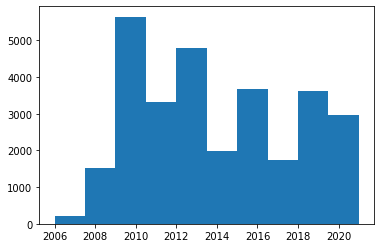

In [677]:
plt.hist(train['registered_year'].values), np.mean(train['registered_year'].values)

In [960]:
fuid

67819

In [1078]:
def load_g_mean(a: np.array) -> dict:
    return {x:y for x,y in a}

def calc_g_mean(uids: pd.DataFrame, groups: pd.DataFrame, prior:float=35, alfa:float=10) -> dict:
    g_sum = defaultdict(float)
    g_count = defaultdict(float)
    uid2age = {u:a for u,a in zip(uids['uid'].values, uids['age'].values)}
    for uid, guid in zip(groups['uid'].values, groups['gid'].values):
        g_sum[guid] += uid2age[uid]
        g_count[guid] += 1
    g_mean = dict()
    for g in g_sum.keys():
        g_mean[g] = (prior * alfa + g_sum[g]) / (alfa + g_count[g])
    return g_mean

def calc_g_reg_mean(uids: pd.DataFrame, groups: pd.DataFrame, prior:float=2014, alfa:float=10) -> dict:
    g_sum = defaultdict(float)
    g_count = defaultdict(float)
    uid2reg = {u:a for u,a in zip(uids['uid'].values, uids['registered_year'].values)}
    for uid, guid in zip(groups['uid'].values, groups['gid'].values):
        g_sum[guid] += uid2reg[uid]
        g_count[guid] += 1
    g_mean = dict()
    for g in g_sum.keys():
        g_mean[g] = (prior * alfa + g_sum[g]) / (alfa + g_count[g])
    return g_mean

def calc_f_mean(uids: pd.DataFrame, friends: pd.DataFrame, prior:float=35, alfa:float=10) -> dict:
    f_sum = defaultdict(float)
    f_count = defaultdict(float)
    uid2age = {u:a for u,a in zip(uids['uid'].values, uids['age'].values)}
    for uid, fid in zip(friends['uid'].values, friends['fuid'].values):
        #if uid in uid2age:
        #    f_sum[fid] += uid2age[uid]
        #    f_count[fid] += 1
        if fid in uid2age:
            f_sum[uid] += uid2age[fid]
            f_count[uid] += 1
    f_mean = dict()
    for f in f_sum.keys():
        f_mean[f] = (prior * alfa + f_sum[f]) / (alfa + f_count[f])
    return f_mean

def calc_f_min(uids: pd.DataFrame, friends: pd.DataFrame, prior:float=35) -> dict:
    f_arr = defaultdict(lambda: [prior,])
    uid2age = {u:a for u,a in zip(uids['uid'].values, uids['age'].values)}
    for uid, fid in zip(friends['uid'].values, friends['fuid'].values):
        #if uid in uid2age:
        #    f_arr[fid].append(uid2age[uid])
        if fid in uid2age:
            f_arr[uid].append(uid2age[fid])
    f_min = dict()
    for f in f_arr.keys():
        f_min[f] = np.min(f_arr[f])
    return f_min

def calc_f_max(uids: pd.DataFrame, friends: pd.DataFrame, prior:float=35) -> dict:
    f_arr = defaultdict(lambda: [prior,])
    uid2age = {u:a for u,a in zip(uids['uid'].values, uids['age'].values)}
    for uid, fid in zip(friends['uid'].values, friends['fuid'].values):
        #if uid in uid2age:
        #    f_arr[fid].append(uid2age[uid])
        if fid in uid2age:
            f_arr[uid].append(uid2age[fid])
    f_max = dict()
    for f in f_arr.keys():
        f_max[f] = np.max(f_arr[f])
    return f_max

def calc_f_med(uids: pd.DataFrame, friends: pd.DataFrame, prior:float=35) -> dict:
    f_arr = defaultdict(lambda: [prior,])
    uid2age = {u:a for u,a in zip(uids['uid'].values, uids['age'].values)}
    for uid, fid in zip(friends['uid'].values, friends['fuid'].values):
        #if uid in uid2age:
        #    f_arr[fid].append(uid2age[uid])
        if fid in uid2age:
            f_arr[uid].append(uid2age[fid])
    f_med = dict()
    for f in f_arr.keys():
        f_med[f] = np.median(f_arr[f])
    return f_med

def calc_f_reg_mean(uids: pd.DataFrame, friends: pd.DataFrame, prior:float=2014, alfa:float=10) -> dict:
    f_sum = defaultdict(float)
    f_count = defaultdict(float)
    uid2reg = {u:a for u,a in zip(uids['uid'].values, uids['registered_year'].values)}
    for uid, fid in zip(friends['uid'].values, friends['fuid'].values):
        #if uid in uid2age:
        #    f_sum[fid] += uid2reg[uid]
        #    f_count[fid] += 1
        if fid in uid2age:
            f_sum[uid] += uid2reg[fid]
            f_count[uid] += 1
    f_mean = dict()
    for f in f_sum.keys():
        f_mean[f] = (prior * alfa + f_sum[f]) / (alfa + f_count[f])
    return f_mean

def calc_mean_of_mean_of_friends(uids: pd.DataFrame, friends: pd.DataFrame, f_mean: dict) -> dict:
    u2f = dict()
    f_list = defaultdict(list)
    for uid, fid in zip(friends['uid'].values, friends['fuid'].values):
        f_list[uid].append(fid)
        f_list[fid].append(uid)
    for u in f_list.keys():
        verified_friends = [f for f in f_list[u] if f in f_mean]
        if len(verified_friends) == 0:
            continue
        u2f[u] = np.mean([f_mean[v] for v in verified_friends])
    return u2f

def calc_mean_of_mean_of_groups(uids: pd.DataFrame, groups: pd.DataFrame, g_mean: dict) -> dict:
    u2f = dict()
    g_list = defaultdict(list)
    for uid, guid in zip(groups['uid'].values, groups['gid'].values):
        g_list[uid].append(guid)
    for u in g_list.keys():
        verified_groups = [g for g in g_list[u] if g in g_mean]
        if len(verified_groups) == 0:
            continue
        u2f[u] = np.mean([g_mean[v] for v in verified_groups])
    return u2f

In [1079]:
f_min = calc_f_min(train, friends)
f_max = calc_f_max(train, friends)
f_med = calc_f_med(train, friends)

In [962]:
g_reg_mean = calc_g_reg_mean(train, groups)
uid2mmg_reg = calc_mean_of_mean_of_groups(train, groups, g_reg_mean)

In [1055]:
f_reg_mean = calc_f_reg_mean(train, friends)
uid2mmf_reg = calc_mean_of_mean_of_friends(train, friends, f_reg_mean)

In [964]:
g_mean = calc_g_mean(train, groups)
uid2mmg = calc_mean_of_mean_of_groups(train, groups, g_mean)

In [1056]:
f_mean = calc_f_mean(train, friends)
uid2mmf = calc_mean_of_mean_of_friends(train, friends, f_mean)

In [1080]:
pd.DataFrame(np.array([[k,v] for k,v in f_min.items()])).to_csv('../submision/data/f_min_p35.csv', index=None, index_label=None)
pd.DataFrame(np.array([[k,v] for k,v in f_max.items()])).to_csv('../submision/data/f_max_p35.csv', index=None, index_label=None)
pd.DataFrame(np.array([[k,v] for k,v in f_med.items()])).to_csv('../submision/data/f_med_p35.csv', index=None, index_label=None)

In [1058]:
pd.DataFrame(np.array([[k,v] for k,v in g_mean.items()])).to_csv('../submision/data/g_mean_p35_a10.csv', index=None, index_label=None)
pd.DataFrame(np.array([[k,v] for k,v in f_mean.items()])).to_csv('../submision/data/f_mean_p35_a10.csv', index=None, index_label=None)
pd.DataFrame(np.array([[k,v] for k,v in g_reg_mean.items()])).to_csv('../submision/data/g_reg_mean_p2014_a10.csv', index=None, index_label=None)
pd.DataFrame(np.array([[k,v] for k,v in f_reg_mean.items()])).to_csv('../submision/data/f_reg_mean_p2014_a10.csv', index=None, index_label=None)

In [58]:
def calc_friends_pagerank(friends: pd.DataFrame) -> np.array:
    friends2way = pd.DataFrame()
    friends2way['uid'] = list(friends['uid']) + list(friends['fuid'])
    friends2way['fuid'] = list(friends['fuid']) + list(friends['uid'])
    friend_weights = friends2way.groupby('uid').fuid.nunique()
    friend2weight = {u:w for u,w in zip(friend_weights.index.values, friend_weights.values)}
    rowf = friends2way['fuid'].values
    colf = friends2way['uid'].values
    dataf = [friend2weight[u] for u in colf]
    train_f2u = csr_matrix((dataf, (rowf, colf)), shape=(max(rowf) + 1, max(colf) + 1))
    friend_pr=pagerank_power(train_f2u, p=0.85, tol=1e-3)
    return friend_pr

In [59]:
f = calc_friends_pagerank(friends)

In [60]:
f

array([3.27044627e-06, 2.52198502e-05, 1.34158138e-06, ...,
       1.38165961e-06, 1.34158138e-06, 1.59154157e-05])